In [1]:
# %load ../include.py

import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import matplotlib

plt.rc('font', family='gulim') # For Windows
matplotlib.rcParams['axes.unicode_minus'] = False 



In [2]:
df1=pd.read_csv('./혼인_및_이혼율_총계.csv',encoding='cp949')

In [3]:
df1=df1.drop('행정구역별(1)',axis=1)
df1

,2009,2009.1,2009.2,2010,2010.1,2010.2,2011,2011.1,2011.2,2012,...,2016.2,2017,2017.1,2017.2,2018,2018.1,2018.2,2019,2019.1,2019.2
0,혼인건수 (건),이혼건수 (건),주민등록인구수(연앙인구) (명),혼인건수 (건),이혼건수 (건),주민등록인구수(연앙인구) (명),혼인건수 (건),이혼건수 (건),주민등록인구수(연앙인구) (명),혼인건수 (건),...,주민등록인구수(연앙인구) (명),혼인건수 (건),이혼건수 (건),주민등록인구수(연앙인구) (명),혼인건수 (건),이혼건수 (건),주민등록인구수(연앙인구) (명),혼인건수 (건),이혼건수 (건),주민등록인구수(연앙인구) (명)
1,300869,120296,50070582.0,317579,113042,50515666.0,321154,110671,50734284.0,327073,...,51112971.5,259340,104364,51230704.0,252339,106785,51344092.0,233911,109035,51337424.0


In [4]:
[ df1.columns[i] for i in range(0,len(df1.columns),3) ]

['2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019']

In [5]:
df2 = pd.DataFrame()

In [6]:
df1.iloc[0,0:3]

2009               혼인건수 (건)
2009.1             이혼건수 (건)
2009.2    주민등록인구수(연앙인구) (명)
Name: 0, dtype: object

In [7]:
df2.index=df1.iloc[0,0:3]

df2 = df1.loc[ :, [ df1.columns[i] for i in range(0,len(df1.columns),3) ]]
df2

In [8]:
# df2[혼인건수, 2009] , df2[이혼건수, 2009]
for col in [ df1.columns[i] for i in range(0,len(df1.columns),3) ]:
    df2.loc[df2.index[0], col] = df1.loc[1, col]   # df2.loc[위치할 index,위치할 컬럼]=df1.loc[가져올 index, 가져올 컬럼] 위치할 컬럼이 None이면 가져올 컬럼에서 컬럼도
    for index in range(1,3):                        #                                                                      같이 가져와서 설정
        col_1 = col + '.' + str(index)
        df2.loc[df2.index[index],col] = df1.loc[1, col_1]   #  df2.index[원하는 값을 설정(index)]

In [9]:
df2.rename(index={'혼인건수 (건)':'혼인건수','이혼건수 (건)':'이혼건수','주민등록인구수(연앙인구) (명)':'주민등록인구수'},inplace=True)
df2 #첫 for 문장으로 2009의 혼인값 가져오고 다음 for 문장으로 2009.1의 (이혼건수)의 값과 2009.2의 값을 가져온다

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,,,,,,,,,,,
혼인건수,300869,317579,321154,327073,315193,297783,295167,276328,259340,252339,233911
이혼건수,120296,113042,110671,114316,111937,112285,106059,105375,104364,106785,109035
주민등록인구수,50070582.0,50515666.0,50734284.0,50948272.0,51141463.0,51327916.0,51529338.0,51112971.5,51230704.0,51344092.0,51337424.0


In [10]:
ddf2=df2.drop('주민등록인구수')
#df3=ddf2.drop('혼인건수 (건)')
df3=df2.iloc[0,:] #위와 같음
ddf3=df2.iloc[1,:]

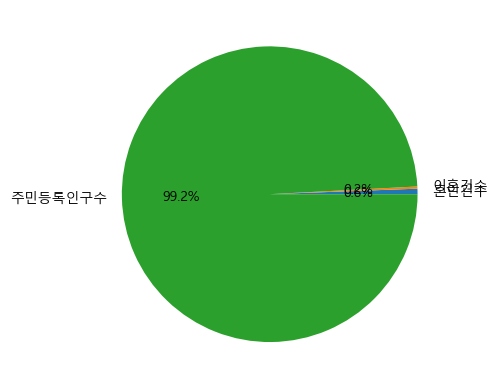

In [11]:
df2=df2.astype(float)
plt.rc('font', family='Malgun Gothic')
plt.pie(x=[df2.loc['혼인건수','2009'],df2.loc['이혼건수','2009'],df2.loc['주민등록인구수','2009']],labels=['혼인건수','이혼건수','주민등록인구수'],autopct='%0.1f%%')
plt.show()

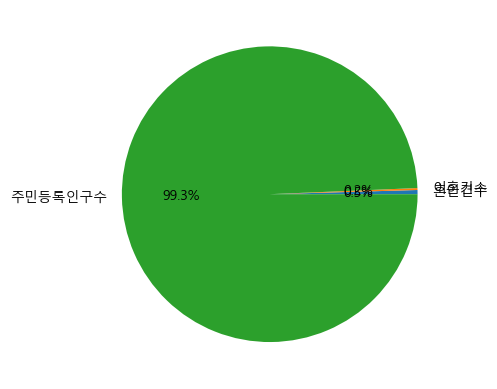

In [12]:
df2=df2.astype(float)
plt.rc('font', family='Malgun Gothic')
plt.pie(x=[df2.loc['혼인건수','2019'],df2.loc['이혼건수','2019'],df2.loc['주민등록인구수','2019']],labels=['혼인건수','이혼건수','주민등록인구수'],autopct='%0.1f%%')
plt.show()

<AxesSubplot:>

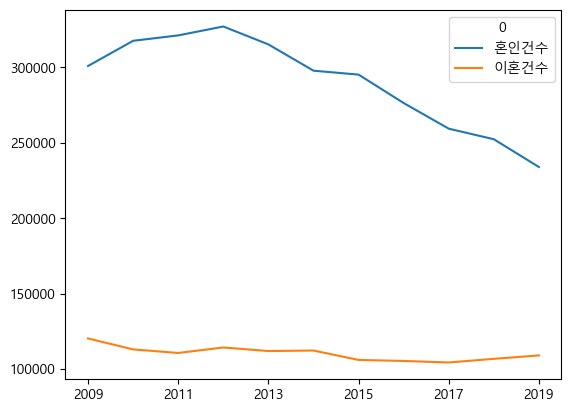

In [13]:
ddf2 = ddf2.astype(float)

ddf2.T.plot()

In [14]:
pd.DataFrame=df3
df3.info

<bound method Series.info of 2009    300869
2010    317579
2011    321154
2012    327073
2013    315193
2014    297783
2015    295167
2016    276328
2017    259340
2018    252339
2019    233911
Name: 혼인건수, dtype: object>

<AxesSubplot:>

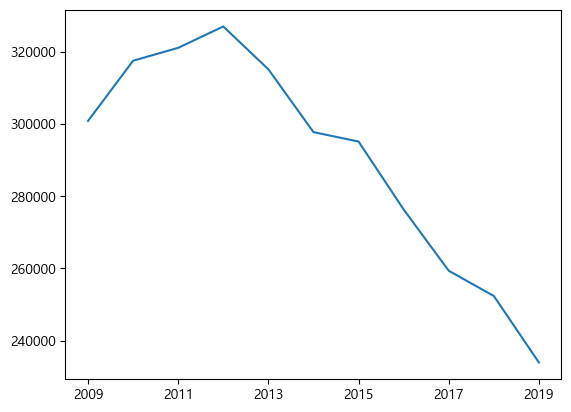

In [15]:
df3 = df3.astype(float)
df3.T.plot()  #혼인 건수

<AxesSubplot:>

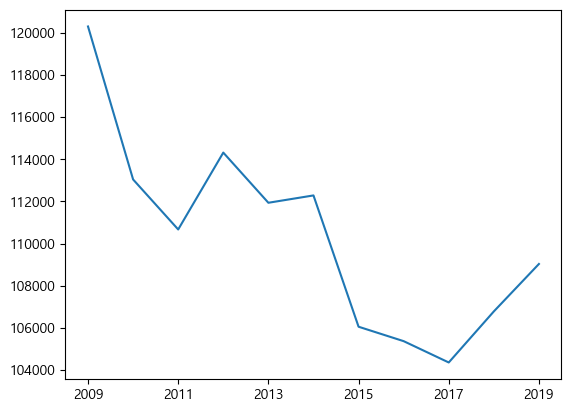

In [16]:
ddf3=ddf3.astype(float)
ddf3.T.plot()# 이혼 건수

In [17]:
df2_T = df2.T
df2_T

,혼인건수,이혼건수,주민등록인구수
2009,300869.0,120296.0,50070582.0
2010,317579.0,113042.0,50515666.0
2011,321154.0,110671.0,50734284.0
2012,327073.0,114316.0,50948272.0
2013,315193.0,111937.0,51141463.0
2014,297783.0,112285.0,51327916.0
2015,295167.0,106059.0,51529338.0
2016,276328.0,105375.0,51112971.5
2017,259340.0,104364.0,51230704.0
2018,252339.0,106785.0,51344092.0


<AxesSubplot:>

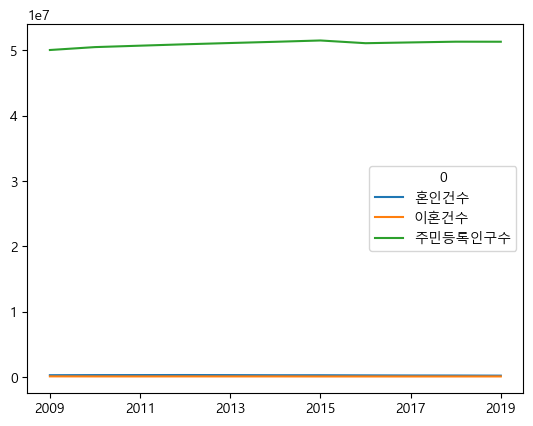

In [18]:
df2_T = df2_T.astype(float)
df2_T.plot()

In [19]:
df2_T.reset_index(inplace=True)

In [20]:
df2_T.rename(columns={'index':'구분'}, inplace=True)
df2_T

,구분,혼인건수,이혼건수,주민등록인구수
0,2009,300869.0,120296.0,50070582.0
1,2010,317579.0,113042.0,50515666.0
2,2011,321154.0,110671.0,50734284.0
3,2012,327073.0,114316.0,50948272.0
4,2013,315193.0,111937.0,51141463.0
5,2014,297783.0,112285.0,51327916.0
6,2015,295167.0,106059.0,51529338.0
7,2016,276328.0,105375.0,51112971.5
8,2017,259340.0,104364.0,51230704.0
9,2018,252339.0,106785.0,51344092.0


In [21]:
df2_T.set_index('구분', inplace=True)

In [22]:
df2_T

,혼인건수,이혼건수,주민등록인구수
구분,,,
2009,300869.0,120296.0,50070582.0
2010,317579.0,113042.0,50515666.0
2011,321154.0,110671.0,50734284.0
2012,327073.0,114316.0,50948272.0
2013,315193.0,111937.0,51141463.0
2014,297783.0,112285.0,51327916.0
2015,295167.0,106059.0,51529338.0
2016,276328.0,105375.0,51112971.5
2017,259340.0,104364.0,51230704.0


<AxesSubplot:xlabel='구분'>

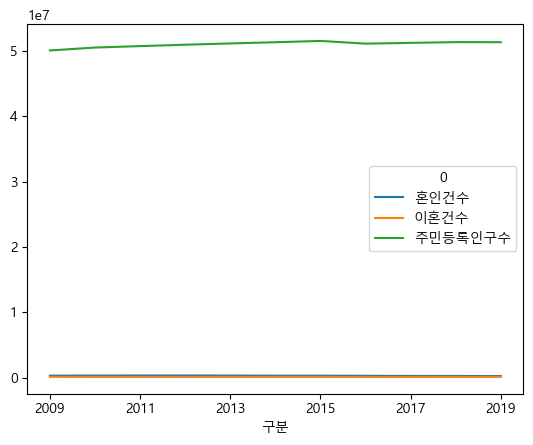

In [23]:
df2_T.plot()

In [24]:
df3=df3.to_frame(name='혼인율')
df3

,혼인율
2009,300869.0
2010,317579.0
2011,321154.0
2012,327073.0
2013,315193.0
2014,297783.0
2015,295167.0
2016,276328.0
2017,259340.0
2018,252339.0


In [25]:
df3 = df3.astype(float)
# for i in range(len(df3.index)):
#     if i==0:
#         df3['증감율(%)']=0
#         continue
#     df3.iloc[i,1]=round(((df3.iloc[i,0])/df3.iloc[i-1,0]-1)*100,2)    
# print(df3)

In [26]:
df3['전년도'] = df3['혼인율'].shift(1)   # 위 식과 같은 정리
df3['증감율(%)'] = round(((df3['혼인율']/ df3['전년도']) -1) * 100,2)
df3.iloc[0,2]=0
df3.drop(columns='전년도',inplace=True)

In [27]:
df3['증감율(%)']

2009    0.00
2010    5.55
2011    1.13
2012    1.84
2013   -3.63
2014   -5.52
2015   -0.88
2016   -6.38
2017   -6.15
2018   -2.70
2019   -7.30
Name: 증감율(%), dtype: float64

fig = plt.figure(figsize=(15,10))

ax1 = fig.add_sub
ax1 = plt.plot(df3.index, df3['증감율(%)'])

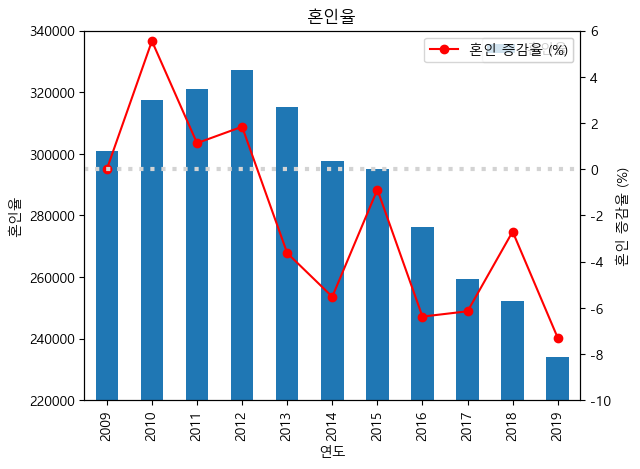

In [29]:
ax1 = df3['혼인율'].plot(kind='bar',label='혼인율')
ax2 = ax1.twinx()
ax2.plot(df3.index, df3['증감율(%)'],marker='o', ls='-', color='red',label='혼인 증감율 (%)')

ax1.set_ylim(220000,340000)
ax2.set_ylim(-10,6)

plt.hlines(0,-1,12, color='lightgray', linestyle=':', linewidth=3)
ax1.legend()
ax2.legend()
ax1.set_xlabel('연도')
ax1.set_ylabel('혼인율')
ax2.set_ylabel('혼인 증감율 (%)')
ax1.set_title('혼인율')

plt.show()